# Plants Hive Table Data Visualisation

In [1]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import HiveContext, SQLContext, SparkSession
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
from PIL import Image
import urllib
import requests
from IPython.display import Image, HTML, display
import io

In [2]:
sc = SparkContext(appName="PlantsHiveTableVisuals")
sqlContext = SQLContext(sc)
sc.setLogLevel("WARN")

spark = SparkSession.builder\
    .appName("PlantsHiveTableVisuals")\
    .config("spark.sql.warehouse.dir","/usr/hive/warehouse")\
    .config("spark.sql.catalogImplementation","hive")\
    .config("hive.metastore.uris","thrift://localhost:9083")\
    .enableHiveSupport()\
    .getOrCreate()

In [3]:
plants_table = spark.sql("SELECT * FROM plants_db.plants_data_table ORDER BY id")
plants_table.show()

+---+-------------------+--------------------+------------------+---------+--------------------+--------------------+------+-----------+--------------+------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+------------------+-------------+-------------------+----------------+-------------+-------------+------------+-----------+-----------------+-----------------+-----------------+---------------------+--------+-----------+------+---------------+-----------+----------+----------+--------------------+-------------+--------------------+------------+------------------------+------------------------+---------------------+-------------------------+-------------------------+---------------+-------------+------------+-------------+
| id|        common_name|     scientific_name|family_common_name|vegetable|     plant_image_url|            duration|edible|edible_part| 

## PieCharts
- edible
- ligneous_type
- growth form
- growth habit
- growth rate
- foliage color
- flower color
- vegetable
- edible part
- shape and orientation

In [4]:
all_rows = plants_table.select("*").collect()

In [5]:
edible = [plant.__getattr__('edible') for plant in all_rows]
ligneous_type = [plant.__getattr__('ligneous_type') for plant in all_rows]
growth_form = [plant.__getattr__('growth_form') for plant in all_rows]
growth_habit = [plant.__getattr__('growth_habit') for plant in all_rows]
growth_rate = [plant.__getattr__('growth_rate') for plant in all_rows]
foliage_color = [plant.__getattr__('foliage_color') for plant in all_rows]
flower_color = [plant.__getattr__('flower_color') for plant in all_rows]
toxicity = [plant.__getattr__('toxicity') for plant in all_rows]

In [6]:
def plot_pie(row_vals,title):
    row_labels = list(set(row_vals))
    row_per_dict = {}
    for elem in row_labels:
        row_per_dict[str(elem)] = round((row_vals.count(elem)/len(row_vals)) * 100, 2) # round result to 2 decimal places
    
    labels = list(row_per_dict.keys())
    sizes = list(row_per_dict.values())
    labels_pie = [labels[i] if sizes[i] > 1 else "" for i in range(len(labels))]
    legend_labels = [str(labels[i])+": "+str(sizes[i])+"%" for i in range(len(sizes))]
    explode = [0 if sizes[i] != max(sizes) else 0.1 for i in range(len(sizes))]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels_pie, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #ax1.set_title('How fast do you want to go today?')
    plt.legend(legend_labels, bbox_to_anchor=(1.1,1.025), loc="upper left")
    plt.title(title, fontsize=20)
    plt.show()

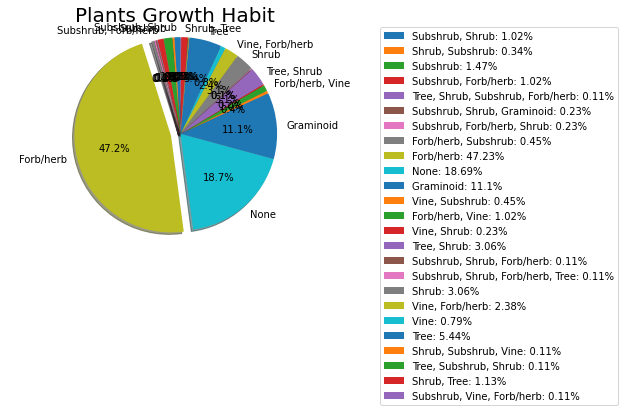

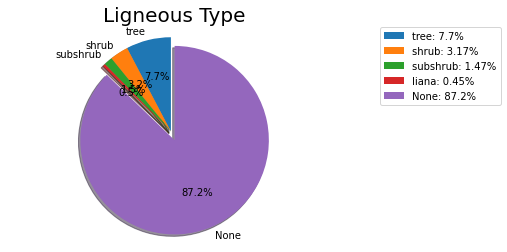

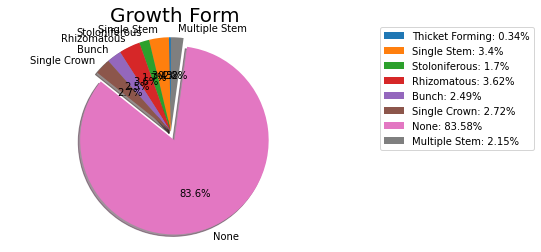

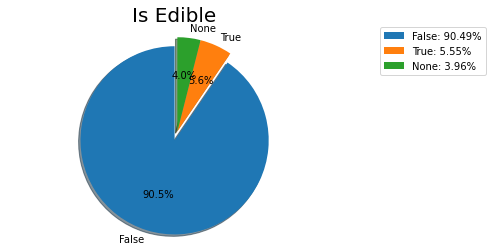

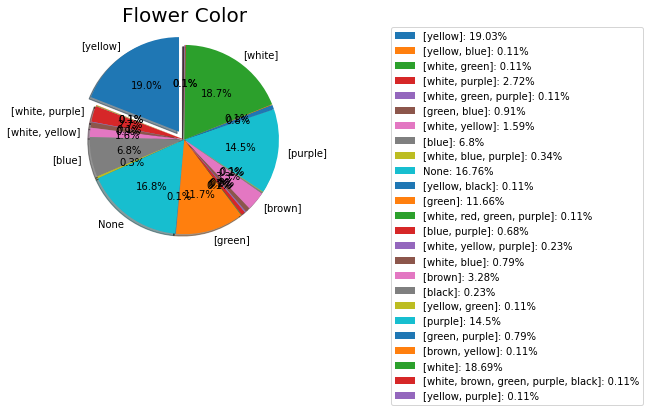

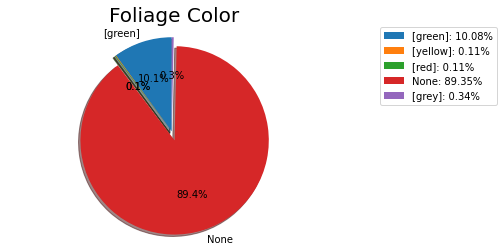

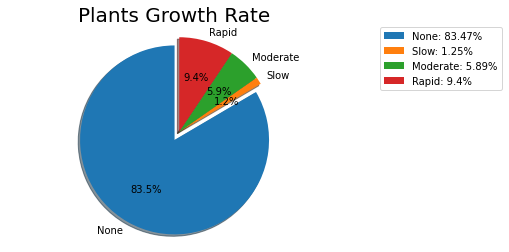

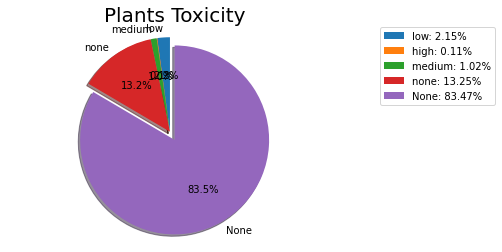

In [7]:
plot_pie(growth_habit,'Plants Growth Habit')
plot_pie(ligneous_type,'Ligneous Type')
plot_pie(growth_form,'Growth Form')
plot_pie(edible,'Is Edible')
plot_pie(flower_color,'Flower Color')
plot_pie(foliage_color,'Foliage Color')
plot_pie(growth_rate,'Plants Growth Rate')
plot_pie(toxicity,'Plants Toxicity')

## Bar Charts
### Data Comparison
- duration
- average height cm
- maximum height cm
- nitrogen fixation
- sowing
- days to harvest
- row spacing
- ph maximum
- ph minimum
- atmospheric humidity
- growth months
- bloom months
- fruit months
- minimum precipitation mm
- maximum precipitation mm
- minimum root depth cm
- minimim temperature deg c
- maximum temperature deg c
- soil nutriments
- soil salinity
- soil texture
- soil humidity

In [8]:
# growth_habit vs average height cm [bar]
growth_habit
average_height_cm = [plant.__getattr__('average_height_cm') for plant in all_rows]
minimum_root_depth_cm = [plant.__getattr__('minimum_root_depth_cm') for plant in all_rows]
minimum_precipitation_mm = [plant.__getattr__('minimum_precipitation_mm') for plant in all_rows]
maximum_precipitation_mm = [plant.__getattr__('maximum_precipitation_mm') for plant in all_rows]

In [9]:
def plot_overlay_bar(x_vals,y_vals,title,ylabel):
    # make sure both lists always have values in thier exact indices
    indx = [i for i in range(len(x_vals)) if x_vals[i] != None and y_vals[i] != None]
    x_vals_gh_v_ah = [x_vals[i] for i in indx]
    y_vals_gh_v_ah = [y_vals[i] for i in indx]

    # create min and max values for each unique growth habit
    unique_x_vals_list = list(set(x_vals_gh_v_ah))
    min_max_val_dict = {}
    for elem in unique_x_vals_list:
        val = []
        for i in range(len(x_vals_gh_v_ah)):
            if elem == x_vals_gh_v_ah[i]:
                val.append(float(y_vals_gh_v_ah[i]))

        min_max_val_dict[elem] = [min(val), max(val)]
    
    fig, ax = plt.subplots()

    y_pos = [min_max_val_dict[key][0] for key in list(min_max_val_dict.keys())]

    width = 0.8

    max_height   = [min_max_val_dict[key][1] for key in list(min_max_val_dict.keys())]
    min_height    = [min_max_val_dict[key][0] for key in list(min_max_val_dict.keys())]

    indices = np.arange(len(max_height))

    plt.bar(indices, max_height, width=width, 
            color='m', label='Max '+ylabel)
    plt.bar(indices, min_height, width=width,
            color='g', alpha=0.9, label='Min '+ylabel)

    plt.xticks(indices+width/2., 
               list(min_max_val_dict.keys()) )
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid()

    plt.legend()
    plt.show()

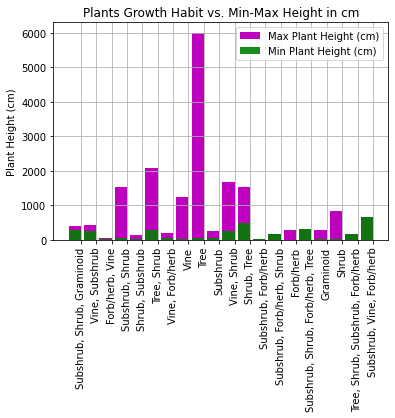

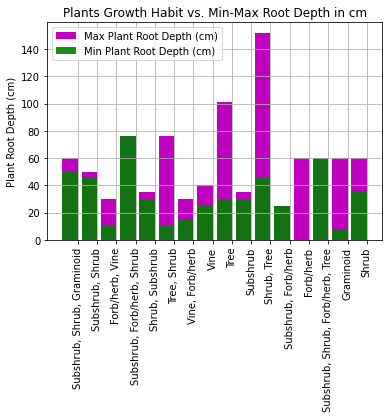

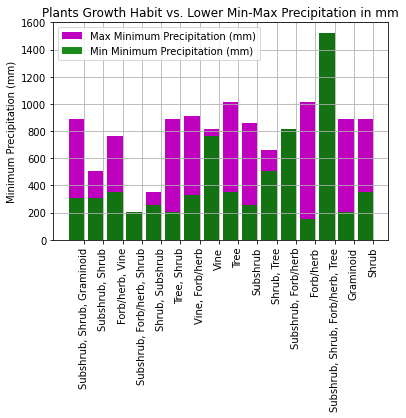

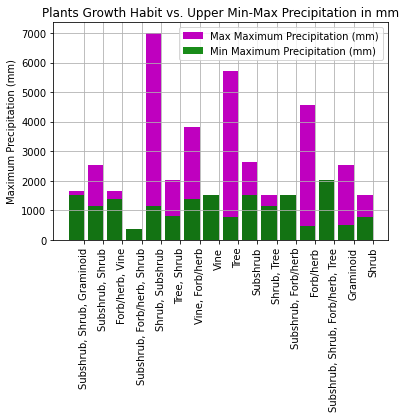

In [10]:
plot_overlay_bar(growth_habit,average_height_cm,title="Plants Growth Habit vs. Min-Max Height in cm",ylabel="Plant Height (cm)")
plot_overlay_bar(growth_habit,minimum_root_depth_cm,title="Plants Growth Habit vs. Min-Max Root Depth in cm",ylabel="Plant Root Depth (cm)")
plot_overlay_bar(growth_habit,minimum_precipitation_mm,title="Plants Growth Habit vs. Lower Min-Max Precipitation in mm",ylabel="Minimum Precipitation (mm)")
plot_overlay_bar(growth_habit,maximum_precipitation_mm,title="Plants Growth Habit vs. Upper Min-Max Precipitation in mm",ylabel="Maximum Precipitation (mm)")

## Scatter Charts
### Data Comparison
- duration
- average height cm
- maximum height cm
- nitrogen fixation
- sowing
- days to harvest
- row spacing
- ph maximum
- ph minimum
- atmospheric humidity
- growth months
- bloom months
- fruit months
- minimum precipitation mm
- maximum precipitation mm
- minimum root depth cm
- minimim temperature deg c
- maximum temperature deg c
- soil nutriments
- soil salinity
- soil texture
- soil humidity

In [11]:
# average height cm vs root depth cm[line]
average_height_cm
minimum_root_depth_cm
growth_habit
minimum_precipitation_mm
maximum_precipitation_mm
minimum_temperature_deg_c = [plant.__getattr__('minimum_temperature_deg_c') for plant in all_rows]
maximum_temperature_deg_c = [plant.__getattr__('maximum_temperature_deg_c') for plant in all_rows]
days_to_harvest = [plant.__getattr__('days_to_harvest') for plant in all_rows]
row_spacing = [plant.__getattr__('row_spacing') for plant in all_rows]
ph_maximum = [plant.__getattr__('ph_maximum') for plant in all_rows]
ph_minimum = [plant.__getattr__('ph_minimum') for plant in all_rows]
atmospheric_humidity = [plant.__getattr__('atmospheric_humidity') for plant in all_rows]
growth_months = [plant.__getattr__('growth_months') for plant in all_rows]
bloom_months = [plant.__getattr__('bloom_months') for plant in all_rows]
fruit_months = [plant.__getattr__('fruit_months') for plant in all_rows]
soil_nutriments = [plant.__getattr__('soil_nutriments') for plant in all_rows]
soil_salinity = [plant.__getattr__('soil_salinity') for plant in all_rows]
soil_texture = [plant.__getattr__('soil_texture') for plant in all_rows]
soil_humidity = [plant.__getattr__('soil_humidity') for plant in all_rows]

In [12]:
def plot_scatter(x_data, y_data, legend_data, title, xlabel, ylabel):
    indx = [i for i in range(len(y_data)) if y_data[i] != None and x_data[i] != None and legend_data[i] != None]
    y_data_plot_vals = [y_data[i] for i in indx]
    x_data_plot_vals = [x_data[i] for i in indx]
    legend_data_plot_vals = [legend_data[i] for i in indx]

    unique_legend_data_plot_vals_list = list(set(legend_data_plot_vals))
    vals_dict = {}
    for elem in unique_legend_data_plot_vals_list:
        val1 = []
        val2 = []
        for i in range(len(indx)):
            if elem == legend_data_plot_vals[i]:
                val1.append(float(y_data_plot_vals[i]))
                val2.append(float(x_data_plot_vals[i]))

        vals_dict[elem] = [val1,val2]
    
    x_vals = [vals_dict[key][1] for key in list(vals_dict.keys())]
    y_vals = [vals_dict[key][0] for key in list(vals_dict.keys())]
    
    colors = cm.rainbow(np.linspace(0, 1, len(x_vals)))
    random.seed(random.randint(1,100)) # reset randomizer
    markers=['o','+','x','*','.','X','s','^']
    for i in range(len(x_vals)):
        plt.scatter(x_vals[i],y_vals[i],color=colors[i], marker=random.choice(markers))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(unique_legend_data_plot_vals_list, bbox_to_anchor=(1.1,1.025), loc="upper left")
    plt.grid()
    plt.show()

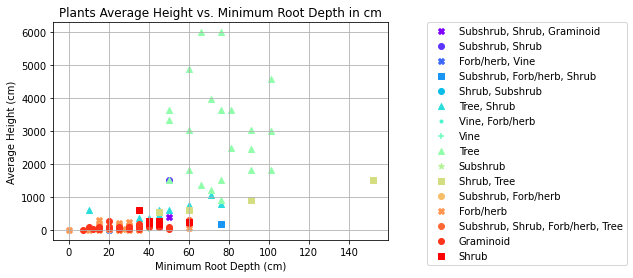

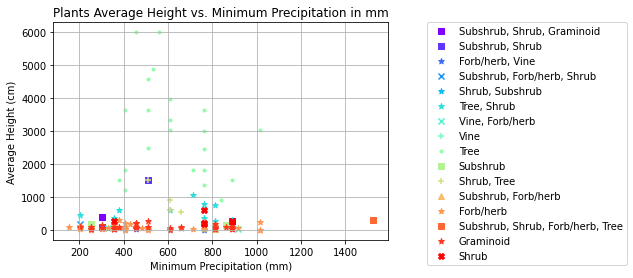

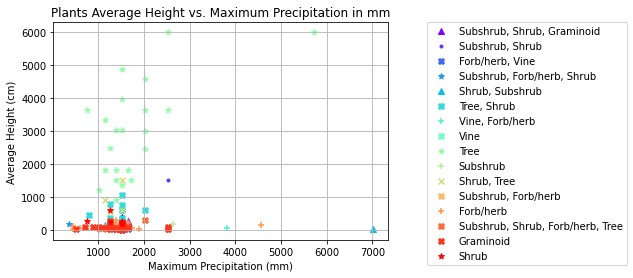

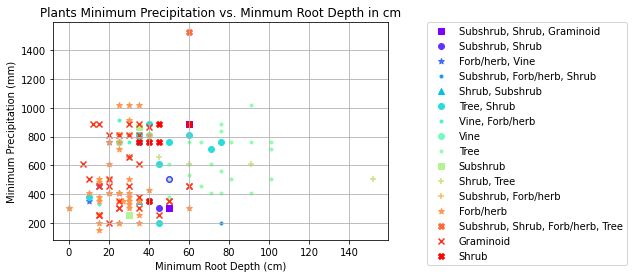

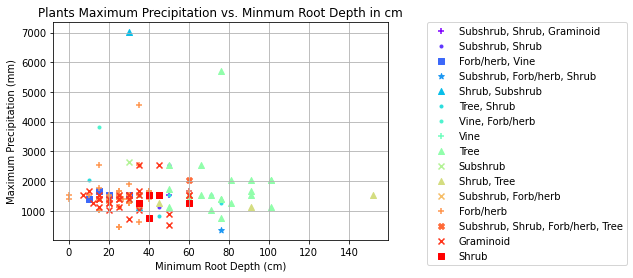

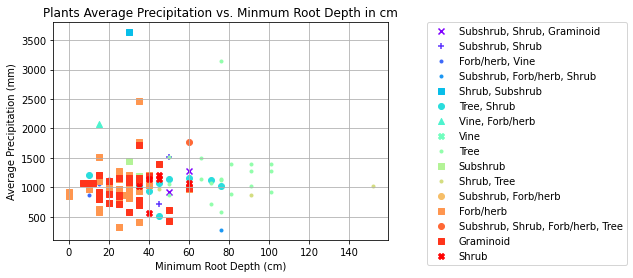

In [13]:
plot_scatter(minimum_root_depth_cm, average_height_cm, growth_habit,
             title='Plants Average Height vs. Minimum Root Depth in cm',
            xlabel='Minimum Root Depth (cm)', ylabel='Average Height (cm)')

plot_scatter(minimum_precipitation_mm, average_height_cm, growth_habit,
             title='Plants Average Height vs. Minimum Precipitation in mm',
            xlabel='Minimum Precipitation (mm)', ylabel='Average Height (cm)')

plot_scatter(maximum_precipitation_mm, average_height_cm, growth_habit,
             title='Plants Average Height vs. Maximum Precipitation in mm',
            xlabel='Maximum Precipitation (mm)', ylabel='Average Height (cm)')

plot_scatter(minimum_root_depth_cm, minimum_precipitation_mm, growth_habit,
             title='Plants Minimum Precipitation vs. Minmum Root Depth in cm',
            xlabel='Minimum Root Depth (cm)', ylabel='Minimum Precipitation (mm)')

plot_scatter(minimum_root_depth_cm, maximum_precipitation_mm, growth_habit,
             title='Plants Maximum Precipitation vs. Minmum Root Depth in cm',
            xlabel='Minimum Root Depth (cm)', ylabel='Maximum Precipitation (mm)')

average_precipitation_mm = [(float(minimum_precipitation_mm[i])+float(maximum_precipitation_mm[i]))/2 if minimum_precipitation_mm[i] != None and maximum_precipitation_mm[i] != None else None for i in range(len(maximum_precipitation_mm))]
plot_scatter(minimum_root_depth_cm, average_precipitation_mm, growth_habit,
             title='Plants Average Precipitation vs. Minmum Root Depth in cm',
            xlabel='Minimum Root Depth (cm)', ylabel='Average Precipitation (mm)')

## Images
- plant_image_url
- fruit_image_url
- flower_image_url
- habit_image_url
- leaf_image_url
- common_name
- family_common_name
- scientific_name
- en
- native
- introduced

In [14]:
common_name = [plant.__getattr__('common_name') for plant in all_rows]
family_common_name = [plant.__getattr__('family_common_name') for plant in all_rows]
scientific_name = [plant.__getattr__('scientific_name') for plant in all_rows]
en = [plant.__getattr__('en') for plant in all_rows]
native = [plant.__getattr__('native') for plant in all_rows]
introduced = [plant.__getattr__('introduced') for plant in all_rows]

plant_image_url = [plant.__getattr__('plant_image_url') for plant in all_rows]
fruit_image_url = [plant.__getattr__('fruit_image_url') for plant in all_rows]
flower_image_url = [plant.__getattr__('flower_image_url') for plant in all_rows]
leaf_image_url = [plant.__getattr__('leaf_image_url') for plant in all_rows]
habit_image_url = [plant.__getattr__('habit_image_url') for plant in all_rows]

In [15]:
def search_imgs_info(search_q="kidney bean"):
    # First Look for the query word from synonyms (en)
    indx_list = []
    for i in range(len(en)):
        for name in en[i]:
            #print(name)
            if search_q.lower() in name.lower():
                indx_list.append(i)
                break
    
    if len(indx_list) > 0 and len(indx_list) > 5:
        print("Please be more specific \nHere are the plants with the keyword: ", search_q, "\n")
        [print("common name: ",common_name[i], "\nscientific_name: ",scientific_name[i], "\nsynonyms: ", en[i], "\n") for i in indx_list[:20]]
        
        if len(indx_list) > 20:
            print("\n ....only showing top 20 results")
    
    elif len(indx_list) > 0 and len(indx_list) <= 5:
        print(len(indx_list), " plants found with the keyword: ", search_q, "\n")
        for i in indx_list:
            print("\ncommon name: ",common_name[i], "\nscientific_name: ",scientific_name[i], "\nsynonyms: ", en[i], "\n")
            
            print("\nPlant Images")
            if type(plant_image_url[i]) == list:
                imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />"\
                                 % str(s) for s in plant_image_url[i][:5]])
            elif type(plant_image_url[i]) == str:
                imagesList= "<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % plant_image_url[i]
            
            display(HTML(imagesList))
            
            
            print("Fruit Images")
            if type(fruit_image_url[i]) == list:
                imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />"\
                                 % str(s) for s in fruit_image_url[i][:5]])
            elif type(fruit_image_url[i]) == str:
                imagesList= "<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % fruit_image_url[i]
                       
            display(HTML(imagesList))
            
            
            print("Flower Images")
            flower_images = flower_image_url[i][1:-1]
            flower_images_list = flower_images.split(", ")
            if type(flower_images_list) == list:
                imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />"\
                                 % str(s) for s in flower_images_list[:5]])
            elif type(flower_image_url[i]) == str:
                imagesList= "<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % flower_image_url[i]
                       
            display(HTML(imagesList))
            
            print("Leaf Images")
            leaf_images = leaf_image_url[i][1:-1]
            leaf_images_list = leaf_images.split(", ")
            if type(leaf_images_list) == list:
                imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />"\
                                 % str(s) for s in leaf_images_list[:5]])
            elif type(leaf_image_url[i]) == str:
                imagesList= "<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % leaf_image_url[i]
                       
            display(HTML(imagesList))
    
    else:
        print("No results found!")
    

In [16]:
search_imgs_info("rose ")

2  plants found with the keyword:  rose  


common name:  oleander 
scientific_name:  Nerium oleander 
synonyms:  ['Rose-bay', 'Adelfa', 'Narcisos', 'Loendro', 'Common Oleander', 'Adelfa blanca', 'Rose bay', 'Rose-laurel', 'Oleander'] 


Plant Images


Fruit Images


Flower Images


Leaf Images



common name:  rose of Sharon 
scientific_name:  Hibiscus syriacus 
synonyms:  ['Shrubby rose-mallow', 'Shrub-althea', 'Shrub Althaea', 'Shrubby Althaea', 'Blue Hibiscus', 'Shrub althea', 'Tulipn', 'Althea', 'Tulipn chino', 'Rose of Sharon', 'Rosa de Siria', 'Common Hibiscus', 'Shrub-althaea', 'Syrian ketmia', 'Syrian hibiscus', 'Rose-of-Sharon'] 


Plant Images


Fruit Images


Flower Images


Leaf Images


In [17]:
search_imgs_info("berry")

Please be more specific 
Here are the plants with the keyword:  berry 

common name:  European mountain ash 
scientific_name:  Sorbus aucuparia 
synonyms:  ['Rowan tree', 'Dogberry', 'Mountain ash', 'Rowan,  moutain ash', 'European Rowan', 'European mountain-ash', 'European mountain ash', 'Rowan-berry', 'Rowan', 'Quickbeam'] 

common name:  black elderberry 
scientific_name:  Sambucus nigra 
synonyms:  ['Bourtree', 'Bore-wood', 'Alderne', 'European Elder', 'Common Elder', 'Europen elder', 'Black Elder', 'Elderberry', 'Common elderberry', 'European elderberry', 'European black elderberry', 'European black elder', 'Black elderberry', 'Saco', 'Elder'] 

common name:  woodland strawberry 
scientific_name:  Fragaria vesca 
synonyms:  ['Garden strawberry', 'California strawberry', 'Alpine Strawberries', 'European wild strawberry', 'Wood strawberry', 'Fresa', 'Fresa silvestre', 'FRAVES', 'Wild strawberry', 'European strawberry', 'Woodland strawberry', 'Alpine strawberry'] 

common name:  bloo

In [18]:
search_imgs_info("European wild strawberry")

1  plants found with the keyword:  European wild strawberry 


common name:  woodland strawberry 
scientific_name:  Fragaria vesca 
synonyms:  ['Garden strawberry', 'California strawberry', 'Alpine Strawberries', 'European wild strawberry', 'Wood strawberry', 'Fresa', 'Fresa silvestre', 'FRAVES', 'Wild strawberry', 'European strawberry', 'Woodland strawberry', 'Alpine strawberry'] 


Plant Images


Fruit Images


Flower Images


Leaf Images
